# 1. Extracting Tesla Stock Data Through the "yfinance" Library

In [3]:
import yfinance as yf
# Download historical data for a stock
tsla=yf.Ticker("TSLA")
tsla_data=tsla.history(period="6mo")
# Display the downloaded data
tsla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-13 00:00:00-04:00,188.389999,191.080002,181.229996,182.470001,118984100,0.0,0.0
2024-06-14 00:00:00-04:00,185.800003,186.000000,176.919998,178.009995,82038200,0.0,0.0
2024-06-17 00:00:00-04:00,177.919998,188.809998,177.000000,187.440002,109786100,0.0,0.0
2024-06-18 00:00:00-04:00,186.559998,187.199997,182.369995,184.860001,68982300,0.0,0.0
2024-06-20 00:00:00-04:00,184.679993,185.210007,179.660004,181.570007,55893100,0.0,0.0


## then we could stay with:

In [5]:
tsla_table = tsla_data[['Close']].reset_index()  # 'Date' está en el índice por defecto, se restaura con reset_index()

# Mostrar la tabla resultante
print(tsla_table)

                         Date       Close
0   2024-06-13 00:00:00-04:00  182.470001
1   2024-06-14 00:00:00-04:00  178.009995
2   2024-06-17 00:00:00-04:00  187.440002
3   2024-06-18 00:00:00-04:00  184.860001
4   2024-06-20 00:00:00-04:00  181.570007
..                        ...         ...
122 2024-12-06 00:00:00-05:00  389.220001
123 2024-12-09 00:00:00-05:00  389.790009
124 2024-12-10 00:00:00-05:00  400.989990
125 2024-12-11 00:00:00-05:00  424.769989
126 2024-12-12 00:00:00-05:00  418.100006

[127 rows x 2 columns]


# 2. Extraction of data from the economic income of the TESLA company through webscraping

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla's financial data on Yahoo Finance
url = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"

# Send an HTTP request to the URL
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    # Find data in the HTML structure
    table = soup.find_all("div", class_="D(tbr)")
    # Extract financial data
    data = []
    for row in table:
        columns = row.find_all("div", class_="D(ib)")
        data.append([col.text for col in columns])
    
    # Create a DataFrame for analysis
    df = pd.DataFrame(data)
    print(df)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Failed to retrieve data. Status code: 404


# 3. Extracting GameStop Stock Data Through the "yfinance" Library

In [6]:
import yfinance as yf
# Download historical data for a stock
gme=yf.Ticker("GME")
gme_data=gme.history(period="6mo")
# Display the downloaded data
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-13 00:00:00-04:00,26.559999,29.580000,25.559999,29.120001,107306600,0.0,0.0
2024-06-14 00:00:00-04:00,29.230000,30.660000,27.410000,28.700001,82874400,0.0,0.0
2024-06-17 00:00:00-04:00,28.549999,29.180000,23.790001,25.219999,90351900,0.0,0.0
2024-06-18 00:00:00-04:00,24.580000,25.969999,23.610001,24.700001,38079200,0.0,0.0
2024-06-20 00:00:00-04:00,24.250000,25.930000,23.650000,25.590000,36029300,0.0,0.0


# 4. Extraction of data from the economic income of the "GameStop" company through webscraping

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop's financial data on Yahoo Finance
url = "https://finance.yahoo.com/quote/GME/financials?p=GME"

# Send an HTTP request to the URL
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find data in the HTML structure
    table = soup.find_all("div", class_="D(tbr)")
    
    # Extract financial data
    data = []
    for row in table:
        columns = row.find_all("div", class_="D(ib)")
        data.append([col.text for col in columns])
    
    # Create a DataFrame for analysis
    df = pd.DataFrame(data)
    print(df)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Failed to retrieve data. Status code: 404


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop's financial data on MarketWatch
url = "https://www.marketwatch.com/investing/stock/gme/financials"

# Send an HTTP request to the URL
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36"
}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the financial table
    table = soup.find('table', class_="table table--overflow align--right")
    if table:
        # Extract table rows
        rows = table.find_all("tr")
        data = []
        for row in rows:
            columns = row.find_all("td")
            data.append([col.text.strip() for col in columns])
        
        # Create a DataFrame for analysis
        df = pd.DataFrame(data)
        print(df)
    else:
        print("Table not found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Failed to retrieve data. Status code: 401


In [10]:
import requests

# Define your Watson Discovery credentials
api_key = "YOUR_IBM_API_KEY"  # Replace with your IBM API Key
url = "https://api.us-south.discovery.watson.cloud.ibm.com/instances/YOUR_INSTANCE_ID"  # Replace with your instance URL

# Set up the query
query = {
    "query": "GameStop financial income",
    "collection_ids": ["YOUR_COLLECTION_ID"],  # Replace with your actual collection ID
    "count": 5  # Number of results to return
}

# Send the request to Watson Discovery
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

response = requests.post(
    f"{url}/v2/projects/YOUR_PROJECT_ID/query",  # Replace YOUR_PROJECT_ID
    json=query,
    headers=headers
)

# Parse and display the results
if response.status_code == 200:
    data = response.json()
    for result in data.get("results", []):
        print(result.get("title", "No Title"))
        print(result.get("text", "No Content"))
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Failed to retrieve data. Status code: 401


# 5. Tesla Stock and Earnings Dashboard


TSLA: $TSLA: possibly delisted; no earnings dates found


Earnings data is not available.


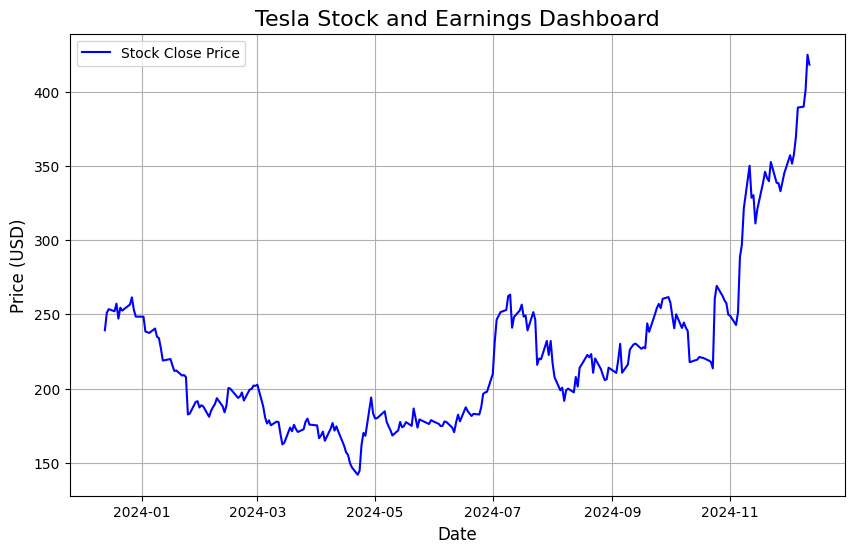

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download Tesla stock data
tsla = yf.Ticker("TSLA")
stock_data = tsla.history(period="1y")  # Stock data for the last 1 year
# Step 2: Download Tesla earnings data (Check if available)
earnings = tsla.earnings_dates  # Earnings dates
# Create a figure for stock price chart
plt.figure(figsize=(10, 6))
# Plot Tesla closing price
plt.plot(stock_data.index, stock_data['Close'], label='Stock Close Price', color='blue')
# Step 3: Check if earnings data is available
if earnings is not None and not earnings.empty:
    # Mark earnings dates on the chart
    for date in earnings.index:
        if date in stock_data.index:
            plt.scatter(date, stock_data.loc[date, 'Close'], color='red', zorder=5, label=f"Earnings {date.strftime('%Y-%m-%d')}")
else:
    print("Earnings data is not available.")

# Step 4: Customize the layout
plt.title("Tesla Stock and Earnings Dashboard", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


# 6. GameStop Stock and Earnings Dashboard

GME: $GME: possibly delisted; no earnings dates found


Earnings data is not available.


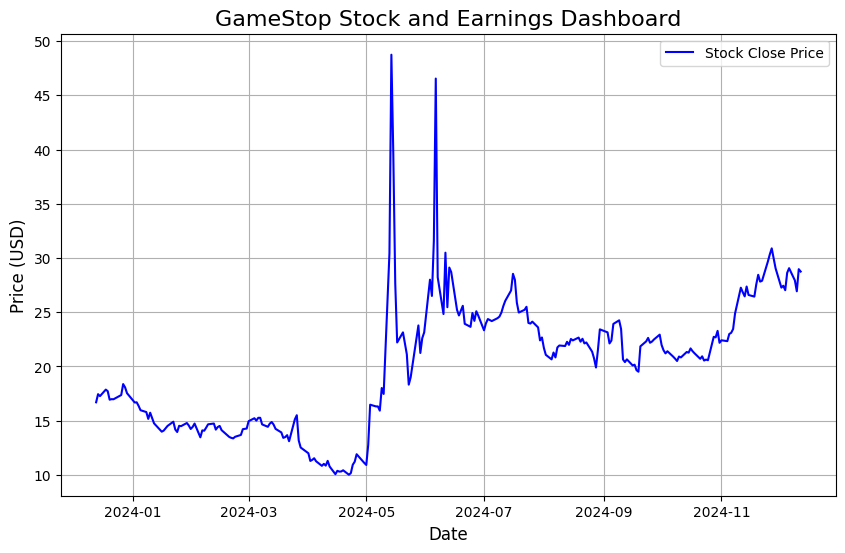

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download GameStop stock data
gme = yf.Ticker("GME")
stock_data = gme.history(period="1y")  # Stock data for the last 1 year
# Step 2: Download GameStop earnings data
earnings = gme.earnings_dates  # Earnings dates
# Create a figure for stock price chart
plt.figure(figsize=(10, 6))
# Plot GameStop closing price
plt.plot(stock_data.index, stock_data['Close'], label='Stock Close Price', color='blue')
# Step 3: Check if earnings data is available
if earnings is not None and not earnings.empty:
    # Mark earnings dates on the chart
    for date in earnings.index:
        if date in stock_data.index:
            plt.scatter(date, stock_data.loc[date, 'Close'], color='red', zorder=5, label=f"Earnings {date.strftime('%Y-%m-%d')}")
else:
    print("Earnings data is not available.")

# Step 4: Customize the layout
plt.title("GameStop Stock and Earnings Dashboard", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
